In [46]:
!pip install selenium
!pip install webdriver-manager

In [47]:
#imported required packages
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import time
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd

## Scraping Rental Data from RentFaster.ca

In [48]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Load the page
URL_ = 'https://www.rentfaster.ca/ab/calgary/'
driver.get(URL_)

In [49]:
time.sleep(5) 
html_content = driver.page_source
soup = BeautifulSoup(html_content, 'html.parser')

In [50]:
prices = soup.find_all(name='span', class_="ng-binding ng-scope")
address = soup.find_all(name='small', class_="dnt has-text-weight-normal has-text-grey ng-binding")
types = driver.find_elements(By.XPATH, "//div[contains(@class, 'ng-binding') and contains(@class, 'is-size-6')]")
bedrooms = soup.find_all('div', class_='level-item ng-binding ng-scope')

In [51]:
all_prices=[]
all_addresses= []
all_types=[]
all_bedrooms = []


# Iterate through each <div> and extract the text from the <span>

for item in bedrooms:
    span = item.find('span', class_='dnt ng-binding')
    if span:
        # Extract and clean the text from the <span>
        full_text = span.text.strip()
        extracted_text = full_text.split('-')[0].strip()  # Take text before '-'
        all_bedrooms.append(extracted_text)

for building_price in prices:
    all_prices.append(building_price.text)

for building_address in address:
    cleaned_address = ' '.join(building_address.text.split())
    all_addresses.append(cleaned_address)


for building_type in types:
    apartment_text = building_type.text.strip()
    all_types.append(apartment_text)

In [52]:
rental_data = {
    "Address": all_addresses,
    "Price(CAD)": all_prices,
    "Bedrooms": all_bedrooms,
    "Type of Building": all_types
}
df_rental = pd.DataFrame(rental_data)

In [53]:
output_file = "apartment_listings.csv"
sheet_name = "Calgary"

df.to_csv(output_file, index= False)

driver.quit()

## Visualizing the Scraped Data

In [54]:
df_rental.head()

,Address,Price(CAD),Bedrooms,Type of Building
0,"5112 Elbow Drive Southwest, Windsor Park, Calgary",1915,1+den,Apartment
1,"320 19 Ave SW, Mission, Calgary",2030,1,Apartment
2,"100 & 200 Quarry Villas SE, Quarry Park, Calgary",1863,1,Apartment
3,"609 8th Street SW, Downtown, Calgary",1435,1,Apartment
4,"620 10 Avenue SW, Beltline, Calgary",1799,1,Apartment


In [120]:
df_rental['Price(CAD)'] = df_rental['Price(CAD)'].astype(str)

df_rental['Price(CAD)'] = df_rental['Price(CAD)'].str.replace(',', '').str.strip()  # Remove commas and strip spaces
df_rental['Price(CAD)'] = pd.to_numeric(df_rental['Price(CAD)'], errors='coerce')
df_rental = df_rental.dropna(subset=['Price(CAD)'])
df_rental['Price(CAD)'] = df_rental['Price(CAD)'].astype(int)

grouped = df_rental.groupby('Bedrooms')['Price(CAD)'].mean().sort_values(ascending=False)

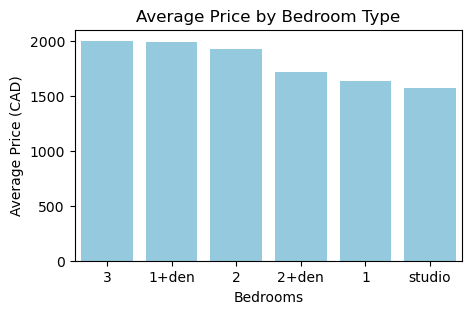

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 3))
sns.barplot(x=grouped.index, y=grouped.values, color="skyblue")

plt.xlabel('Bedrooms')
plt.ylabel('Average Price (CAD)')
plt.title('Average Price by Bedroom Type');

In [138]:
building_pct= df_rental.groupby('Type of Building')['Address'].size().reset_index(name='count')
building_pct["percentage"] = building_pct['count'] / building_pct['count'].sum() * 100

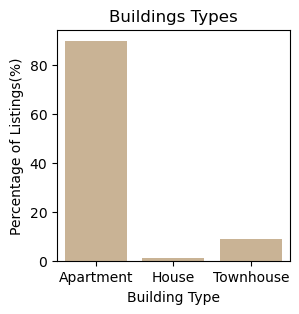

In [154]:
plt.figure(figsize=(3, 3))
sns.barplot(x=building_pct['Type of Building'], y=building_pct['percentage'], color='tan')

plt.xlabel('Building Type')
plt.ylabel('Percentage of Listings(%)')
plt.title('Buildings Types');